In [74]:
import sys
sys.path.append('../')

In [55]:
from mypackage import *

In [56]:
import yfinance as yf

In [57]:
#Get the data
ticker = "AAPL"  # Apple Inc. as an example
#stock_data = yf.download(ticker, period="2y", interval="1d") # This gives a different dataframe (its broken) have to add .T[0] to the values method
stock = yf.Ticker(ticker)
stock_data = stock.history(start='2020-01-01', end=None)

# Extract high, low, close, and volume from the stock data
highs = stock_data['High'].values
lows = stock_data['Low'].values
closes = stock_data['Close'].values
volumes = stock_data['Volume'].values
stock_data

Open        High         Low       Close  \
Date                                                                        
2020-01-02 00:00:00-05:00   71.721019   72.776598   71.466812   72.716072   
2020-01-03 00:00:00-05:00   71.941343   72.771760   71.783977   72.009132   
2020-01-06 00:00:00-05:00   71.127866   72.621646   70.876075   72.582909   
2020-01-07 00:00:00-05:00   72.592571   72.849201   72.021208   72.241524   
2020-01-08 00:00:00-05:00   71.943751   73.706271   71.943751   73.403641   
...                               ...         ...         ...         ...   
2025-02-11 00:00:00-05:00  228.199997  235.229996  228.130005  232.619995   
2025-02-12 00:00:00-05:00  231.199997  236.960007  230.679993  236.869995   
2025-02-13 00:00:00-05:00  236.910004  242.339996  235.570007  241.529999   
2025-02-14 00:00:00-05:00  241.250000  245.550003  240.990005  244.600006   
2025-02-18 00:00:00-05:00  244.149994  245.179993  241.839996  244.470001   

                              Volume  Dividends  Stock Splits  
Date                                                           
2020-01-02 00:00:00-05:00  135480400        0.0           0.0  
2020-01-03 00:00:00-05:00  146322800        0.0           0.0  
2020-01-06 00:00:00-05:00  118387200        0.0           0.0  
2020-01-07 00:00:00-05:00  108872000        0.0           0.0  
2020-01-08 00:00:00-05:00  132079200        0.0           0.0  
...                              ...        ...           ...  
2025-02-11 00:00:00-05:00   53718400        0.0           0.0  
2025-02-12 00:00:00-05:00   45243300        0.0           0.0  
2025-02-13 00:00:00-05:00   53614100        0.0           0.0  
2025-02-14 00:00:00-05:00   40896200        0.0           0.0  
2025-02-18 00:00:00-05:00   48822500        0.0           0.0  

[1289 rows x 7 columns]

In [58]:
indicators_df = calculate_technical_indicators(highs, lows, closes, volumes) # The minimum price array length to run this is >50
indicators_df.set_index(stock_data.index,inplace=True)
indicators_df = indicators_df.dropna() # Make sure the indicators are well aligned and don't contain Nan's at the end
indicators_df

SMA         EMA        RSI      MACD  \
Date                                                                     
2020-03-13 00:00:00-04:00   71.016009   70.074976  45.068556 -2.656636   
2020-03-16 00:00:00-04:00   70.012046   68.999196  40.052915 -3.219858   
2020-03-17 00:00:00-04:00   69.209507   68.272017  41.593066 -3.418262   
2020-03-18 00:00:00-04:00   68.275800   67.471029  43.998932 -3.654584   
2020-03-19 00:00:00-04:00   67.359445   66.702642  43.661296 -3.834678   
...                               ...         ...        ...       ...   
2025-02-11 00:00:00-05:00  230.660196  232.813759  59.899979 -2.272413   
2025-02-12 00:00:00-05:00  230.852506  233.200067  63.532549 -1.674229   
2025-02-13 00:00:00-05:00  231.048569  233.993394  67.753111 -0.814748   
2025-02-14 00:00:00-05:00  231.878104  235.003548  65.145573  0.112820   
2025-02-18 00:00:00-05:00  232.615233  235.905115  57.847549  0.827891   

                           MACD_Signal  Bollinger_Upper  Bollinger_Lower  \
Date                                                                       
2020-03-13 00:00:00-04:00    -2.033230        80.766008        61.266009   
2020-03-16 00:00:00-04:00    -2.270555        80.436878        59.587213   
2020-03-17 00:00:00-04:00    -2.500097        79.702344        58.716670   
2020-03-18 00:00:00-04:00    -2.730994        78.605036        57.946565   
2020-03-19 00:00:00-04:00    -2.951731        77.419416        57.299473   
...                                ...              ...              ...   
2025-02-11 00:00:00-05:00    -2.557698       241.037387       220.283005   
2025-02-12 00:00:00-05:00    -2.381004       241.535819       220.169194   
2025-02-13 00:00:00-05:00    -2.067753       242.346879       219.750259   
2025-02-14 00:00:00-05:00    -1.631638       244.518522       219.237686   
2025-02-18 00:00:00-05:00    -1.139732       246.340859       218.889607   

                                ATR        VWAP         CCI  ...        TSI  \
Date                                                         ...              
2020-03-13 00:00:00-04:00  4.711268   72.356216  -95.652495  ...  -9.204918   
2020-03-16 00:00:00-04:00  5.085168   71.879710 -168.017773  ... -11.298311   
2020-03-17 00:00:00-04:00  5.220895   71.521407 -138.284272  ... -13.051697   
2020-03-18 00:00:00-04:00  5.152424   71.164598 -141.449540  ... -14.627213   
2020-03-19 00:00:00-04:00  4.947707   70.847478 -121.268923  ... -16.518613   
...                             ...         ...         ...  ...        ...   
2025-02-11 00:00:00-05:00  6.723470  137.668069   21.477668  ... -20.437954   
2025-02-12 00:00:00-05:00  6.834557  137.706928   66.496654  ... -21.048632   
2025-02-13 00:00:00-05:00  7.017030  137.755098  139.858987  ... -20.957850   
2025-02-14 00:00:00-05:00  6.674194  137.792898  164.518421  ... -20.599206   
2025-02-18 00:00:00-05:00  6.175718  137.837935  140.765118  ... -19.599416   

                           Chaikin_Oscillator  Ichimoku_Conversion_Line  \
Date                                                                      
2020-03-13 00:00:00-04:00       -5.375283e+07                 66.854435   
2020-03-16 00:00:00-04:00       -1.372142e+08                 66.123972   
2020-03-17 00:00:00-04:00       -6.547066e+07                 64.932405   
2020-03-18 00:00:00-04:00       -4.650305e+07                 64.460402   
2020-03-19 00:00:00-04:00        6.721499e+06                 64.012655   
...                                       ...                       ...   
2025-02-11 00:00:00-05:00       -9.271954e+06                232.354530   
2025-02-12 00:00:00-05:00        5.076181e+06                232.125000   
2025-02-13 00:00:00-05:00        3.266444e+07                234.455002   
2025-02-14 00:00:00-05:00        5.473397e+07                235.990005   
2025-02-18 00:00:00-05:00        6.690364e+07                235.990005   

                           Ichimoku_Base_Line  Keltner_Upper  Keltner_Lower  \

In [59]:
from datetime import datetime, timedelta


def fetch_stock_data(numstocks=40, tickers=None, start_date='2020-01-01', end_date=None, min_volume=1000000, verbose=False):
    """
    Fetch stock data for multiple tickers and organize it for technical analysis
    
    Parameters:
    -----------
    numstocks : int
        Number of stocks to fetch data from
    tickers : list or None
        List of stock tickers. If None, fetches top S&P 500 stocks by volume
    start_date : str
        Start date for historical data (YYYY-MM-DD)
    end_date : str
        End date for historical data (YYYY-MM-DD)
    min_volume : float
        Minimum average daily volume threshold
    
    Returns:
    --------
    dict : Dictionary with keys:
        - 'data': Dictionary of DataFrames for each stock with the ticker as the key
        - 'valid_tickers': List of successfully processed tickers
    """
    if end_date is None:
        end_date = datetime.today().strftime('%Y-%m-%d')
    
    if tickers is None:
        tickers = get_top_tickers()
    
    tickers=tickers[:numstocks]
    # Initialize dictionaries
    stock_data = {}
    valid_tickers = []
    
    print(f"Fetching data for {len(tickers)} stocks...")
    
    for ticker in tickers:
        try:
            # Fetch data using yfinance
            stock = yf.Ticker(ticker)
            df = stock.history(start=start_date, end=end_date)
            
            # Check volume threshold
            if df['Volume'].mean() < min_volume:
                if verbose : print(f"Skipping {ticker}: insufficient volume")
                continue
            
            # Prepare data arrays for your indicator function
            highs = df['High'].values
            lows = df['Low'].values
            closes = df['Close'].values
            volumes = df['Volume'].values

            # Calculate indicators using your function
            indicators = calculate_technical_indicators(highs, lows, closes, volumes)
            indicators.set_index(df.index,inplace=True)
            
            # Store raw data

            stock_data[ticker] = pd.concat([df,indicators],axis=1)
            
            
            
            valid_tickers.append(ticker)
            if verbose : print(f"Successfully processed {ticker}")
            
        except Exception as e:
            if verbose : print(f"Error processing {ticker}: {str(e)}")
            continue
    
    print(f"\nSuccessfully processed {len(valid_tickers)} stocks")
    
    return {
        'data': stock_data,
        'valid_tickers': valid_tickers
    }

def prepare_training_data(stock_data, window_size=5, stock_ticker=None, verbose=False):
    """
    Prepares training data for ML models from stock data
    
    Parameters:
    -----------
    stock_data : dict
        Output of fetch_stock_data with keys 'data' (dict of DataFrames) and 'valid_tickers' (list of tickers).
    window_size : int
        The number of days in each data slice.
    stock_ticker : str or None
        Specific stock ticker to process. If None, processes all valid tickers.
    verbose : bool
        If True, provides detailed logs of the processing.
    
    Returns:
    --------
    list
        A list of tuples where each tuple contains:
        - A 5-day slice of data as a DataFrame (or array, depending on preference).
        - A signal (0 for down, 1 for up) indicating the direction of the price movement.
    """
    training_data = []
    
    # Select tickers to process
    tickers = stock_data['valid_tickers'] if stock_ticker is None else [stock_ticker]
    
    for ticker in tickers:
        if verbose:
            print(f"Processing {ticker}...")
        
        # Fetch the stock DataFrame
        df = stock_data['data'].get(ticker)
        df = df.dropna()
        if df is None or len(df) < window_size + 1:
            if verbose:
                print(f"Skipping {ticker}: insufficient data")
            continue
        
        # Ensure the DataFrame is sorted by date
        df = df.sort_index()
        
        # Extract slices and signals
        for i in range(len(df) - window_size - 1):
            # Slice 5 days of data
            slice_data = df.iloc[i:i + window_size]
            
            # Get the closing price of the next day
            next_day_close = df.iloc[i + window_size + 1]['Close']
            
            # Compare it with the last closing price in the slice
            signal = 1 if next_day_close > slice_data.iloc[-1]['Close'] else 0
            
            # Add slice and signal to the training data
            training_data.append((slice_data, signal))
    
    if verbose:
        print(f"Generated {len(training_data)} training samples.")
    
    return training_data


In [60]:
datastock= fetch_stock_data(200)

Fetching data for 200 stocks...


$BRK.B: possibly delisted; no timezone found
$BF.B: possibly delisted; no price data found  (1d 2020-01-01 -> 2025-02-19)



Successfully processed 163 stocks


In [61]:
processeddata= prepare_training_data(datastock,window_size=10)

In [62]:
processeddata

[(                                Open       High        Low      Close  \
  Date                                                                    
  2020-03-13 00:00:00-04:00  96.721462  97.187890  89.855415  97.181030   
  2020-03-16 00:00:00-04:00  89.073474  92.942054  87.804525  89.793686   
  2020-03-17 00:00:00-04:00  90.500175  93.813163  88.901985  92.214973   
  2020-03-18 00:00:00-04:00  88.113176  95.596551  88.065158  93.984642   
  2020-03-19 00:00:00-04:00  94.457927  96.152147  91.179232  94.320740   
  2020-03-20 00:00:00-04:00  94.704874  95.507395  84.169152  85.664459   
  2020-03-23 00:00:00-04:00  87.907411  88.072031  78.222235  80.849304   
  2020-03-24 00:00:00-04:00  83.881053  91.535915  82.996221  91.035194   
  2020-03-25 00:00:00-04:00  91.330144  92.386462  86.974557  90.225815   
  2020-03-26 00:00:00-04:00  90.397306  93.545674  89.587924  93.408493   
  
                               Volume  Dividends  Stock Splits         SMA  \
  Date             

In [63]:
def preprocess_training_data(training_data):
    """
    Converts training data slices into feature vectors and labels.
    
    Parameters:
    -----------
    training_data : list
        Output of prepare_training_data (list of tuples with slices and signals).
    
    Returns:
    --------
    X : np.ndarray
        Feature matrix (n_samples, n_features).
    y : np.ndarray
        Target labels (n_samples,).
    """
    X = []
    y = []
    
    for slice_data, signal in training_data:
        # Flatten the slice into a 1D array of features, we take eveything by default
        features = slice_data.values.flatten()
        X.append(features)
        y.append(signal)
    
    return np.array(X), np.array(y)

In [64]:
# Preprocess the data
X,y=preprocess_training_data(processeddata)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [65]:
X.shape

(199520, 310)

In [66]:
baseline_accuracy = max(np.mean(y == 0), np.mean(y == 1))
baseline_accuracy

0.5285785886126704

## We start with random forest

In [67]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize the model
model1 = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model1.fit(X_train, y_train)

# Evaluate the model
y_pred = model1.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.6483309943865276
              precision    recall  f1-score   support

           0       0.64      0.57      0.60     18666
           1       0.65      0.72      0.69     21238

    accuracy                           0.65     39904
   macro avg       0.65      0.64      0.64     39904
weighted avg       0.65      0.65      0.65     39904



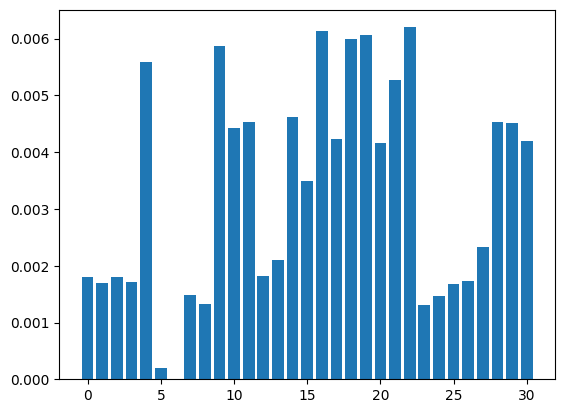

In [68]:
import matplotlib.pyplot as plt

# For Random Forest
importances = model1.feature_importances_
#plt.bar(range(len(importances)), importances)
plt.bar(range(31), importances[:31])
plt.show()

In [69]:
# For hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Initialize the grid search
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring='accuracy')

# Fit the grid search
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

KeyboardInterrupt: 

## Now XGBOOST

In [70]:
import xgboost as xgb
from sklearn.metrics import classification_report, accuracy_score

# Initialize the model
model2 = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the model
model2.fit(X_train, y_train)

# Evaluate the model
y_pred = model2.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.5532528067361668
              precision    recall  f1-score   support

           0       0.54      0.29      0.37     18666
           1       0.56      0.79      0.65     21238

    accuracy                           0.55     39904
   macro avg       0.55      0.54      0.51     39904
weighted avg       0.55      0.55      0.52     39904



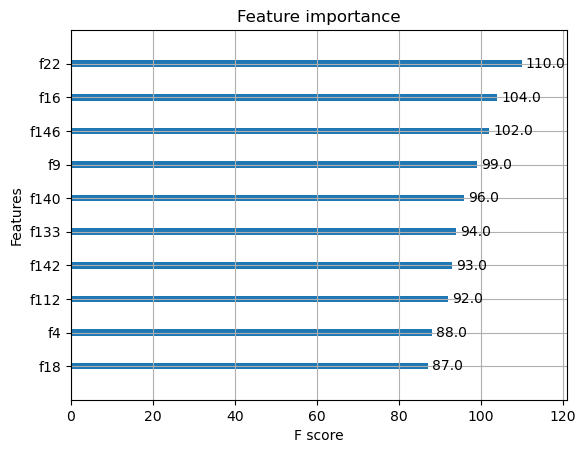

In [ ]:
xgb.plot_importance(model2,max_num_features=10)
plt.show()

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# Initialize the randomized search
random_search = RandomizedSearchCV(xgb.XGBClassifier(random_state=42), param_grid, n_iter=10, cv=3, scoring='accuracy')

# Fit the randomized search
random_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

Best Parameters: {'subsample': 0.8, 'n_estimators': 200, 'max_depth': 9, 'learning_rate': 0.1, 'colsample_bytree': 0.9}
Best Score: 0.591581022124014


In [82]:
# Choose best model to save
model = model1

import joblib
joblib.dump(model, "../models/basic_tree_indicators.joblib")



['../models/basic_tree_indicators.joblib']